Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

get_ipython().run_line_magic('pylab', 'inline')
pylab.rcParams['figure.figsize'] = (15, 5)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("data/day.csv")

Muchos de los datos ya se encuentran normalizados (continuos) y expresados numéricamente (categoricos)

# Attrs

## season

In [23]:
season_map = {1:"primavera",2:"verano", 3:"otoño", 4: "invierno"}
seasons = data.season.map(lambda x: season_map[x])
season_freq = np.unique(seasons,return_counts=True)

In [61]:
counts_by_season = data.groupby(data.season).cnt.apply(lambda x: np.array(x)).rename(season_map)

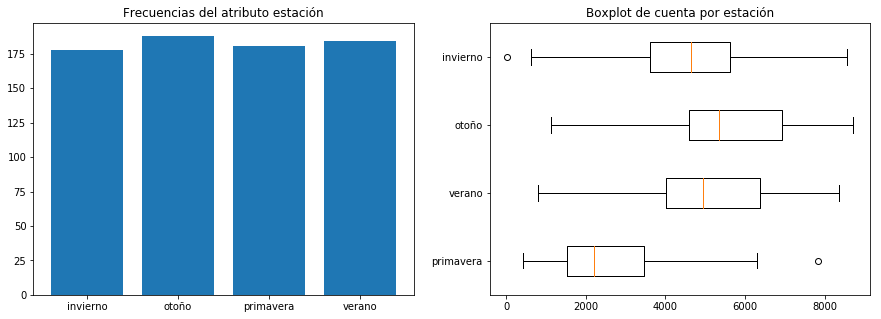

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(season_freq[0],season_freq[1])
ax1.set_title("Frecuencias del atributo estación")
ax2.boxplot(counts_by_season,labels=counts_by_season.index,vert=False)
ax2.set_title("Boxplot de cuenta por estación")
plt.show()

## year

In [68]:
year_map = {0:"2011",1:"2012"}
years = data.yr.map(lambda x: year_map[x])
years_freq = np.unique(years,return_counts=True)

In [70]:
counts_by_year = data.groupby(data.yr).cnt.apply(lambda x: np.array(x)).rename(year_map)

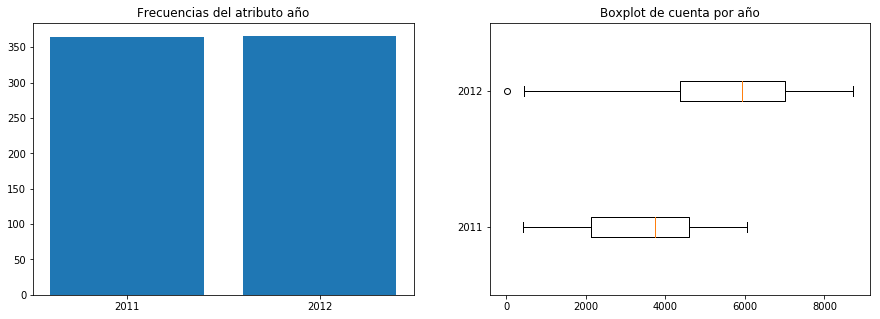

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(years_freq[0],years_freq[1])
ax1.set_title("Frecuencias del atributo año")
ax2.boxplot(counts_by_year,labels=counts_by_year.index, vert=False)
ax2.set_title("Boxplot de cuenta por año")
plt.show()

## holiday

In [106]:
holiday_freq = np.unique(data.holiday.map(lambda x: "si" if x else "no"),return_counts=True)

In [115]:
counts_by_holiday = data.groupby(data.holiday).cnt.apply(lambda x: np.array(x)).rename({0:"no",1:"si"})

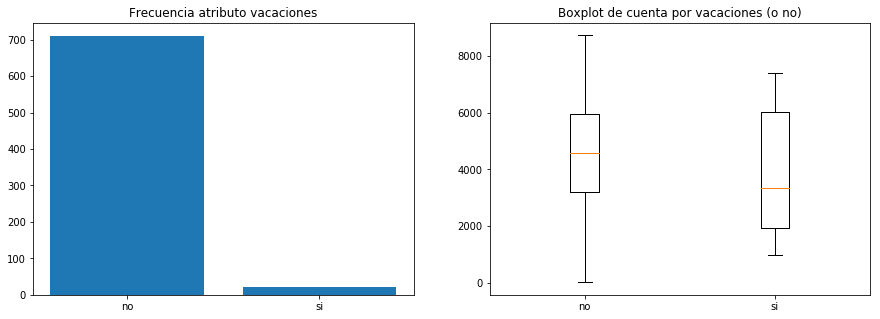

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(holiday_freq[0],holiday_freq[1])
ax1.set_title("Frecuencia atributo vacaciones")
ax2.boxplot(counts_by_holiday, vert=True, labels=counts_by_holiday.index)
ax2.set_title("Boxplot de cuenta por vacaciones (o no)")
plt.show()

## workingday

In [135]:
wd_freq = np.unique(data.workingday.map(lambda x: "si" if x else "no"),return_counts=True)

In [136]:
counts_by_wd = data.groupby(data.workingday).cnt.apply(lambda x: np.array(x)).rename({0:"no",1:"si"})

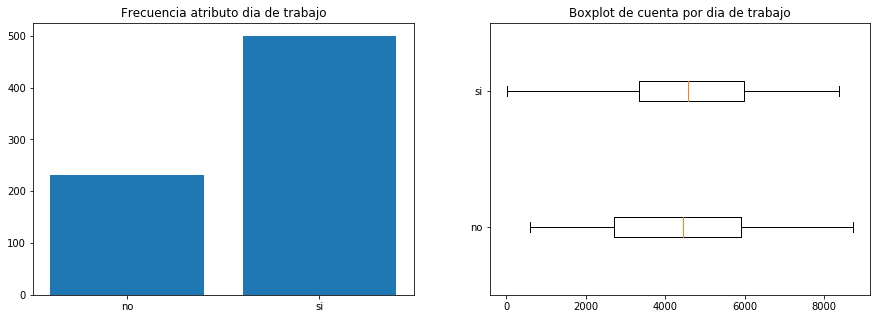

In [139]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(wd_freq[0],wd_freq[1])
ax1.set_title("Frecuencia atributo dia de trabajo")
ax2.boxplot(counts_by_wd,labels=counts_by_wd.index, vert=False)
ax2.set_title("Boxplot de cuenta por dia de trabajo")
plt.show()

## weekday

Asumiento 0=Principio de semana (Americano)=Domingo

In [125]:
wkd_map = {0:"Dom",1:"Lun",2:"Mar",3:"Mier",4:"Jue",5:"Vie",6:"Sat"}
wkd_freq = np.unique(data.weekday.map(wkd_map),return_counts=True)

In [126]:
counts_by_wkd = data.groupby(data.weekday).cnt.apply(lambda x: np.array(x)).rename(wkd_map)

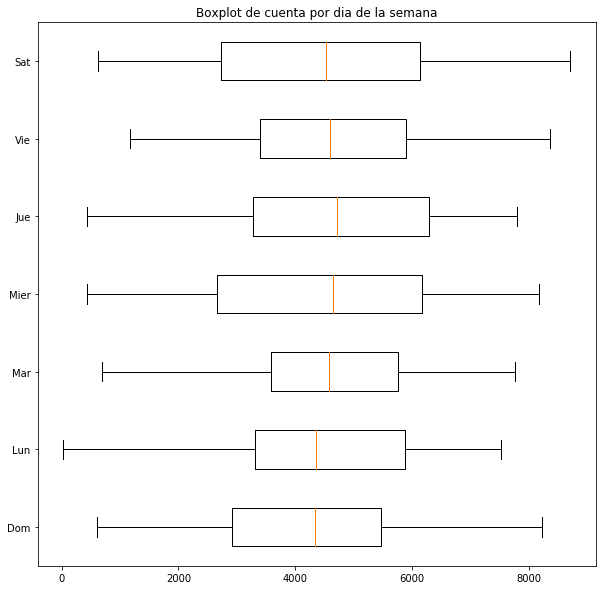

In [133]:
pylab.rcParams['figure.figsize'] = (10, 10)
fig, (ax2) = plt.subplots(1,1)
ax2.boxplot(counts_by_wkd,labels=counts_by_wkd.index, vert=False)
ax2.set_title("Boxplot de cuenta por dia de la semana")
plt.show()

## weather

In [143]:
wth_map = {1:"despejado",2:"nublado",3:"precipitaciones_leves",4:"precipitaciones_severas"}
wth_freq = np.unique(data.weathersit.map(wth_map),return_counts=True)
counts_by_wth = data.groupby(data.weathersit).cnt.apply(lambda x: np.array(x)).rename(wth_map)

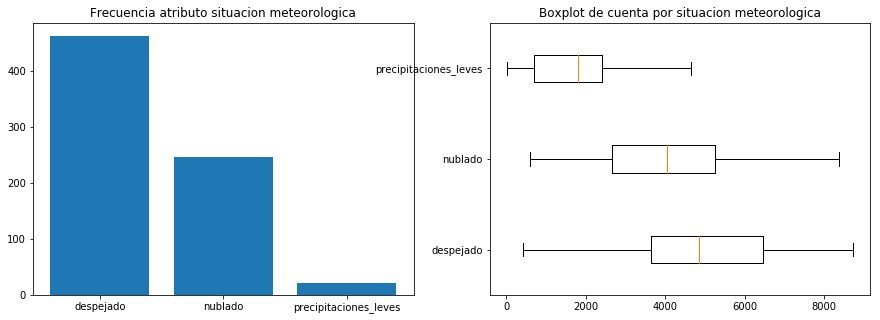

In [145]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(wth_freq[0],wth_freq[1])
ax1.set_title("Frecuencia atributo situacion meteorologica")
ax2.boxplot(counts_by_wth,labels=counts_by_wth.index, vert=False)
ax2.set_title("Boxplot de cuenta por situacion meteorologica")
plt.show()

## temp

In [169]:
temp_deg = data.temp.apply(lambda x: x*41)

In [170]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (temp_deg.mean(),temp_deg.std(),temp_deg.min(),temp_deg.max()))

Media: 20.310776 Desv. Tipica: 7.505091 Rango: [2.424346 35.328347]


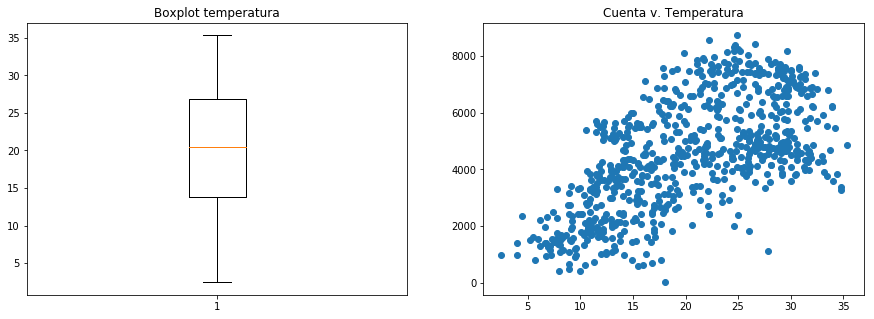

In [198]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(temp_deg)
ax1.set_title("Boxplot temperatura")
ax2.plot(temp_deg,data.cnt, 'o')
ax2.set_title("Cuenta v. Temperatura")
plt.show()

## atemp

In [194]:
atemp_deg = data.atemp.apply(lambda x: x*50)

In [195]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (atemp_deg.mean(),atemp_deg.std(),atemp_deg.min(),atemp_deg.max()))

Media: 23.717699 Desv. Tipica: 8.148059 Rango: [3.953480 42.044800]


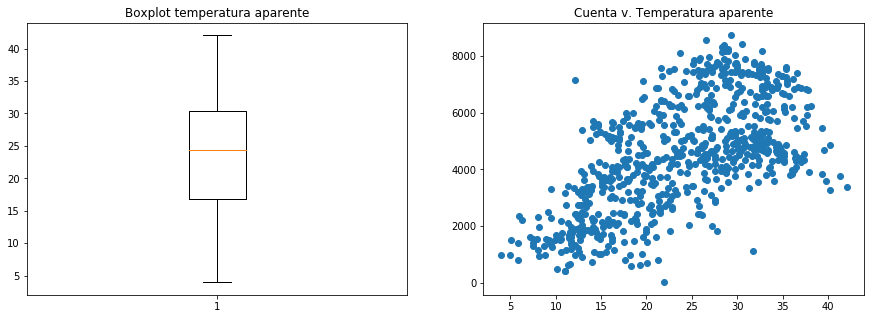

In [199]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(atemp_deg)
ax1.set_title("Boxplot temperatura aparente")
ax2.plot(atemp_deg,data.cnt, 'o')
ax2.set_title("Cuenta v. Temperatura aparente")
plt.show()

## hum

In [207]:
hum_nor = data.hum.apply(lambda x: x*100)

In [208]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (hum_nor.mean(),hum_nor.std(),hum_nor.min(),hum_nor.max()))

Media: 62.789406 Desv. Tipica: 14.242910 Rango: [0.000000 97.250000]


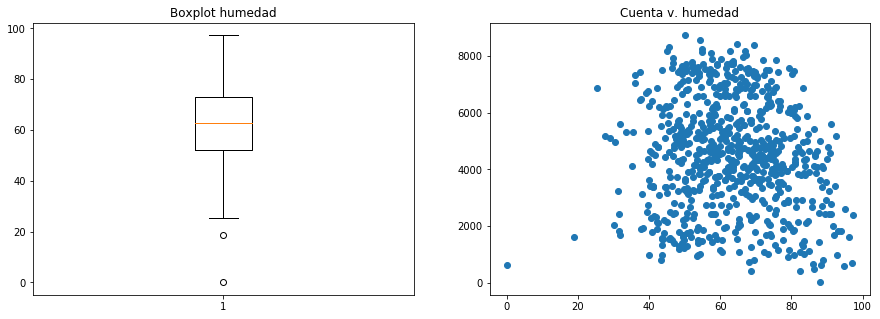

In [209]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(hum_nor)
ax1.set_title("Boxplot humedad")
ax2.plot(hum_nor,data.cnt, 'o')
ax2.set_title("Cuenta v. humedad")
plt.show()

## windspeed

In [210]:
wnd_nor = data.windspeed.apply(lambda x: x*67)

In [211]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (wnd_nor.mean(),wnd_nor.std(),wnd_nor.min(),wnd_nor.max()))

Media: 12.762576 Desv. Tipica: 5.192357 Rango: [1.500244 34.000021]


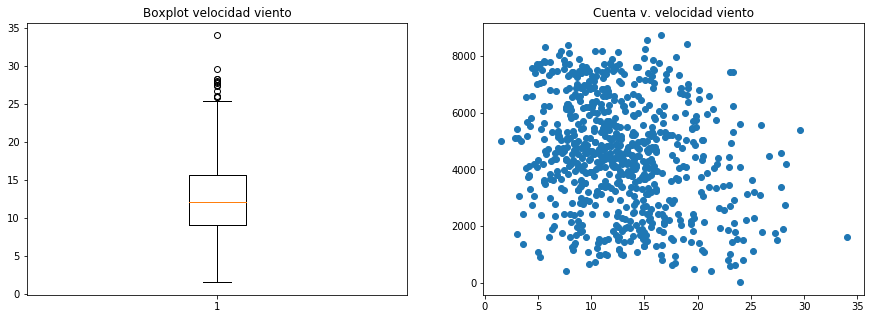

In [212]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(wnd_nor)
ax1.set_title("Boxplot velocidad viento")
ax2.plot(wnd_nor,data.cnt, 'o')
ax2.set_title("Cuenta v. velocidad viento")
plt.show()

## count

In [214]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (data.cnt.mean(),data.cnt.std(),data.cnt.min(),data.cnt.max()))

Media: 4504.348837 Desv. Tipica: 1937.211452 Rango: [22.000000 8714.000000]


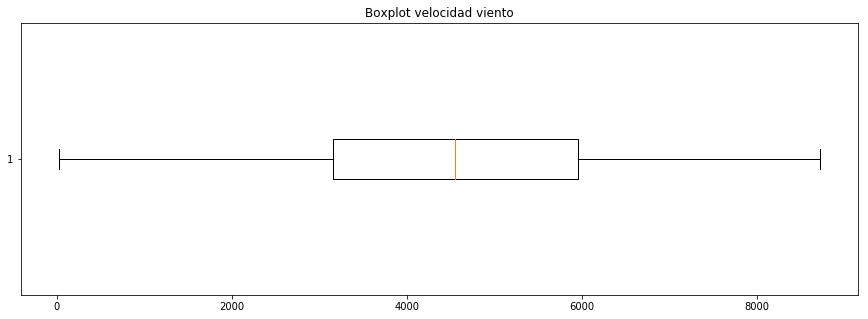

In [215]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1) = plt.subplots(1,1)
ax1.boxplot(data.cnt,vert=False)
ax1.set_title("Boxplot velocidad viento")
plt.show()